<a href="https://colab.research.google.com/github/chelynl/NLP/blob/main/NLP_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following along the 3 simple projects outlined here:<br>
https://towardsdatascience.com/3-super-simple-projects-to-learn-natural-language-processing-using-python-8ef74c757cd9
<br>

***

<b>Project 1: Word Cloud</b>

We will build a simple word cloud to see the frequency of words appearing in email text bodies that may undercover common themes or patterns.

In [44]:
# Import packages
from google.colab import drive
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [8]:
# Authorize and mount drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Import data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/emails.csv')

In [14]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [35]:
# Initial EDA

# Determine counts of categories
print("spam count: ", sum(df['spam']==1))
print("not spam count: ", sum(df['spam']==0))

# See dimensions
print('dimensions before: ', emails.shape)

# Drop dups
df.drop_duplicates(inplace=True)

# See dim after dropping dups
print('dimensions after', df.shape)

spam count:  1368
not spam count:  4327
dimensions before:  (5728, 2)
dimensions after (5695, 2)


Prior to building the word cloud, we must clean and normalize the text.

In [43]:
# list to store clean text
clean_desc = []

for text in df['text']:

  # convert text to lowercase
  desc = text.lower()

  # remove punctuation
  desc = re.sub('[^a-zA-Z]', ' ', desc)

  # remove tags
  desc = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", desc)

  # remove digits and special chars
  desc = re.sub("(\\d|\\W)+"," ", desc)

  # append to clean list
  clean_desc.append(desc)

# Assign clean list to text column
df['text'] = clean_desc

df.head()

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject color printing special request additio...,1
4,subject do not have money get software cds fro...,1


In [50]:
# Define stop words to remove in word cloud
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']

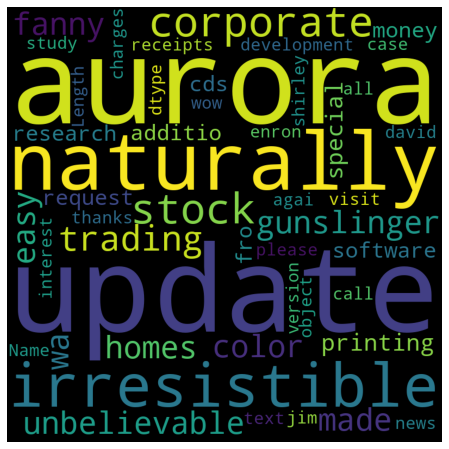

In [52]:
# Build word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'black', 
                      stopwords = stop_words, max_words = 1000, 
                      min_font_size = 20).generate(str(df['text']))

# Plot word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<b>Project 2: Spam Detection</b>

This is a binary classification problem and we will use tokenization, vectorization, and classification algorithms to determine whether a text is spam or not.

In [53]:
# Import packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble 
from sklearn.metrics import classification_report, accuracy_score

In [58]:
# Transform text to numbers via tokenization

#list of sentences
text = ["the dog is white", "the cat is black", "the cat and the dog are friends"]

#instantiate the class
cv = CountVectorizer()

#tokenize and build vocab
cv.fit(text)
print('positions =', cv.vocabulary_)

# transform the text
vector = cv.transform(text)
print(vector.toarray())

positions = {'the': 7, 'dog': 4, 'is': 6, 'white': 8, 'cat': 3, 'black': 2, 'and': 0, 'are': 1, 'friends': 5}
[[0 0 0 0 1 0 1 1 1]
 [0 0 1 1 0 0 1 1 0]
 [1 1 0 1 1 1 0 2 0]]


In [66]:
# Bag of words method: count of words within doc

# create BOW representation as sparse matrix
text_vec = CountVectorizer().fit_transform(df['text'])

# partition data with test size of 45%
X_train, X_test, y_train, y_test = train_test_split(text_vec, df['spam'], test_size = 0.45, random_state = 42, shuffle = True)

In [70]:
# Instantiate xgboost model as classifier
gbc = ensemble.GradientBoostingClassifier(
    n_estimators = 100,
    learning_rate = 0.5,
    max_depth = 6
)

# Fit model to training data
gbc.fit(X_train, y_train)

# Get predictions
predictions = gbc.predict(X_test)

# See accuracy report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1926
           1       0.98      0.90      0.94       637

    accuracy                           0.97      2563
   macro avg       0.98      0.95      0.96      2563
weighted avg       0.97      0.97      0.97      2563



<b>Project 3: Sentiment Analysis</b>